In [1]:
%matplotlib inline

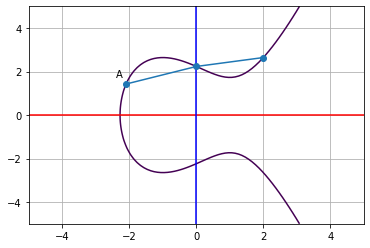

In [67]:
import numpy as np
import matplotlib.pyplot as plt

a = -3
b = 5

y, x = np.ogrid[-5:5:100j, -5:5:100j]
z = pow(y, 2) - pow(x, 3) - x * a - b

def y_value(x):
    return pow(pow(x, 3) + x * a + b, 0.5)

plt.contour(x.ravel(), y.ravel(), z, [0])
plt.axhline(y=0, color='r')
plt.axvline(x=0, color='b')

line = np.array([
    [-2.1, y_value(-2.1)],
    # TODO: calculate intersection point here
    [0, y_value(0)],
    [2, y_value(2)]
])
 
plt.plot(line[:,0], line[:,1], marker = 'o')
plt.annotate('A', xy=line[0] + np.array([-0.3, 0.3]))

plt.grid()
plt.show()